# A/B TESTING FOR MARKETING CAMAPIGN
## A/B Testing Project - Juniarto Kurniawan

### Daftar Isi Desain Eksperimen

### Part I - Introduction

Sebuah Marketing Perusahaan ingin melakukan kampanye yang sukses. Strategi kampanye  perusahaan saat ini hanya bergantung pada Public Services Announcement (PSA). Perusahaan inngin melakukan strategi baru menggunakan iklan. Namun Perusahaan masih tidak yakin apakah iklan baru yang akan di kampanyekan akan sukses menaikkan User Conversion atau tidak. Oleh karena itu maka sebagai data analyst perlu membuat solusi agar kampanye tersebut dapat dilhat hasilnya secara efektif. Salah satu analisis yang dapat dilakukan adalah dengan menggunakan A/B Testing.
Pengambilan data dilakukan dengan mengukur beberapa parameter yaitu :
1. Usert id 	: User ID pelanggan (unique)
2. Test Group 	: terdiri dari 2 kategori yaitu “Ad” – Orang yang melihat iklan kampanye terbaru dan “PSA” – Orang yang hanya melihat melalui Public Service Announcement.
3. Converted	: Orang yang telah membeli produk
4. Total ads 	: Jumlah iklan yang dilihat oleh tiap orang
5. Most Ads day	: Hari dimana orang melihat jumlah iklan yang paling besar
6. Most ads hour	: jam dimana orang melihat jumlah iklan yang paling besar

Experiment Goal
Tujuan dari dilakukan perubahan kampamanye ini adalah apakah desain kampanye terbaru yang melalui iklan akan lebih sukses dari sebelumnya sehingga dapat meningkatkan revenue?


Choosing Metrics
Driver Metrics : Conversion Rate atas iklan tersebut, semakin banyak orang yang convert setelah melihat iklan tersebut maka semakin sukses kampanyenya.
Guardrail Metrics : jumlah unique user pada tiap grup (ads dan PSA), dimana karena ini akan melakukan kampanye baru maka mayoritas orang akan terekspose kampanye baru (experimental group) dan Sebagian kecil untuk orang yang terekspose PSA (Control Group)

### Part II - Menghitung Ukuran Sample dengan Power Analysis

- Remember, we can use the given formula to calculate the minimum number of sample size needed.

$$
n = \cfrac{2 \sigma^2 (z_{1-\alpha/2}+z_{1-\beta})^2}{\delta^2}
$$

- Thus, if we have the $z$ value, we can determine the number of sample.
- Let's find it.

Penentuan Asumsi:
- Karena menginkan ukuran sampel yang cukup besar maka standar deviasi standar deviasi diasumsikan sebesar 7%
- Significant value yang umum digunakan untuk penelitian non medis (penelitian yang bukan menyangkut nyawa/ laboratorium) maka diasumsikan sebesar 5%
- Karena berdasarkan keputusan manajemen akan lebih profitable jika effect size meningkat sebesar 1%.
- Power level akan mengikuti yang dianjurkan oleh berbagai literatur yaitu 80%.

In [1]:
from scipy import stats

# Given
delta = 0.01        # absolute increase of two groups means
alpha = 0.05        # significance level
power = 0.8         # power
std_dev = 0.07      # variance of population (assumed / approximated)

# calculate beta
beta = 1 - power

# calculate the z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

# then calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Number of sample size needed    : {n:.2f}")

Number of sample size needed    : 769.19


Ukuran sample untuk masing-masing grup adalah sebesar 770 sample.

Secara Ideal Eksperimen dilakukan dengan mendeliver kampanye selama tiga hari kemudian kita ambil data terhadap orang2 yang terekspos kampanye baru (ads) maupun kampanye lama (PSA) secara random sesuai dengan kebutuhan sampel. Kemudian dilakukan pengukuran dengan melihat Convert Rate dari user target tersebut

### Part III - Running Experiment & Obtaining Data

Pada kasus kali ini telah diberikan datasetnya, sehingga kita melakukan pengambilan sample sebanyak 770 sample pada masing-grup dengan cara randomsasi.

#### Load Data

In [2]:
# load data
import pandas as pd
import numpy as np

In [3]:
#Load Dataset Sample
data = pd.read_csv(r'D:\PELATIHAN DATA SCIENCE\AB Testing\marketing_AB.csv')
data.head()

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user_id        588101 non-null  int64 
 2   test_group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total_ads      588101 non-null  int64 
 5   most_ads_day   588101 non-null  object
 6   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
data.groupby(['converted'])['converted'].count()

converted
False    573258
True      14843
Name: converted, dtype: int64

In [6]:
user_ad = data[(data.test_group == "ad")]
user_ad.head()

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
user_psa = data[(data.test_group == "psa")]
user_psa.head()

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
18,18,900681,psa,False,248,Saturday,19
38,38,905704,psa,False,27,Thursday,8
68,68,904595,psa,False,13,Tuesday,19
140,140,901904,psa,False,32,Wednesday,19
157,157,902234,psa,False,105,Tuesday,19


#### Randomisasi Sample

In [8]:
sample_ad = user_ad.sample(n=770, random_state=1)
sample_ad.head()

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
60858,60858,1525830,ad,False,5,Saturday,17
50703,50703,1513094,ad,False,59,Thursday,10
552126,552126,1475135,ad,False,6,Tuesday,13
165249,165249,1635331,ad,False,96,Tuesday,19
290461,290461,1499483,ad,True,119,Saturday,15


In [9]:
sample_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 60858 to 8383
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     770 non-null    int64 
 1   user_id        770 non-null    int64 
 2   test_group     770 non-null    object
 3   converted      770 non-null    bool  
 4   total_ads      770 non-null    int64 
 5   most_ads_day   770 non-null    object
 6   most_ads_hour  770 non-null    int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 42.9+ KB


In [10]:
sample_psa = user_psa.sample(n=770, random_state=1)
sample_psa.head()

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
67034,67034,901932,psa,False,139,Saturday,15
35349,35349,915417,psa,False,6,Friday,0
62023,62023,917589,psa,False,39,Saturday,13
546552,546552,900967,psa,False,11,Monday,17
73802,73802,912104,psa,False,42,Saturday,18


In [11]:
sample_psa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 67034 to 45333
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     770 non-null    int64 
 1   user_id        770 non-null    int64 
 2   test_group     770 non-null    object
 3   converted      770 non-null    bool  
 4   total_ads      770 non-null    int64 
 5   most_ads_day   770 non-null    object
 6   most_ads_hour  770 non-null    int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 42.9+ KB


#### Check Trustworthiness

In [12]:
# Checking missing value
sample_ad.isna().sum()

Unnamed: 0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [13]:
# Checking missing value
sample_psa.isna().sum()

Unnamed: 0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [14]:
# Checking duplicate data
dup_ad = sample_ad.duplicated(['user_id']).sum()
dup_psa = sample_psa.duplicated(['user_id']).sum()
print(f"Jumlah User_id Grup Ad yang terdapat duplikat     : {dup_ad}")
print(f"Jumlah User_id Grup Psa yang terdapat duplikat    : {dup_psa}")

Jumlah User_id Grup Ad yang terdapat duplikat     : 0
Jumlah User_id Grup Psa yang terdapat duplikat    : 0


In [15]:
#checking Invalid Value Group Ad
tst_grp_ad = sample_ad["test_group"].unique()
cnvrtd_ad = sample_ad["converted"].unique()
mad_ad = sample_ad["most_ads_day"].unique()
print(f"Inputan unik test_group Grup Ad yaitu     : {tst_grp_ad}")
print(f"Inputan unik converted Grup Ad yaitu      : {cnvrtd_ad}")
print(f"Inputan unik most ads days Grup Ad yaitu  : {mad_ad}")

Inputan unik test_group Grup Ad yaitu     : ['ad']
Inputan unik converted Grup Ad yaitu      : [False  True]
Inputan unik most ads days Grup Ad yaitu  : ['Saturday' 'Thursday' 'Tuesday' 'Monday' 'Friday' 'Sunday' 'Wednesday']


In [16]:
#checking Invalid Value Group PSA
tst_grp_psa = sample_psa["test_group"].unique()
cnvrtd_psa = sample_psa["converted"].unique()
mad_psa = sample_psa["most_ads_day"].unique()
print(f"Inputan unik test_group Grup PSA yaitu     : {tst_grp_psa}")
print(f"Inputan unik converted Grup PSA yaitu      : {cnvrtd_psa}")
print(f"Inputan unik most ads days Grup PSA yaitu  : {mad_psa}")

Inputan unik test_group Grup PSA yaitu     : ['psa']
Inputan unik converted Grup PSA yaitu      : [False  True]
Inputan unik most ads days Grup PSA yaitu  : ['Saturday' 'Friday' 'Monday' 'Sunday' 'Wednesday' 'Thursday' 'Tuesday']


INTERPRETASI

Berdasarkan analisis Truthworthiness untuk kedua grup sample yaitu Ad dan PSA diperoleh kesimpulan bahwa tidak terdapat missing value, maupun duplikat data serta untuk isian tiap mkolom telah sisuai. Sehingga dapat dilanjutkan ke analisis Simple Rasio Missmatch (SRM)

#### Simple Ratio Missmatch (SRM)
Dilakukan pada Grup PSA sebagai grup control dan Grup Ad sebagai Grup Eksperimen (no SRM Issue karena sample mempunyai rasio yang sama 50 : 50)

In [17]:
# Number of users in the control group
n_control = sample_psa.shape[0]
n_control

770

In [18]:
# Number of users in the
n_treatment = sample_ad.shape[0]
n_treatment

770

In [19]:
# Percentage in each group
n_total = n_treatment + n_control
persen_control = n_control/n_total * 100
persen_treat = n_treatment/n_total * 100

print(f"% control   : {persen_control:.2f}%")
print(f"% treatment : {persen_treat:.2f}%")

% control   : 50.00%
% treatment : 50.00%


In [20]:
observed = [ n_control, n_treatment ]
total_show= sum(observed)
expected = [ total_show/2, total_show/2 ]

In [21]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)

# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.01
df=(2-1)*(2-1)  

import scipy
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

#Make decisions from chi-square statistics and critical value
if chi[0] > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Critical value: 6.635
Fail to reject H0 : No SRM


### Part IV - Analyzing and Interpreting Data

#### Menghitung Conversion Rate
Sebelum dilakukan analisa A/B testing terlebih dahulu dilakukan analisa perhitungan conversion rate terhadap grup control dan treatment.

In [22]:
# Banyak user yang konversi di group Control dan Treatment
n_convert_cont = (sample_psa['converted']).value_counts()[True]
n_convert_treat = (sample_ad['converted']).value_counts()[True]
print(f"Jumlah User_id yang convert pada grup control (PSA) adalah sebanyak     : {n_convert_cont}")
print(f"Jumlah User_id yang convert pada grup treatment (Ad) adalah sebanyak    : {n_convert_treat}")

Jumlah User_id yang convert pada grup control (PSA) adalah sebanyak     : 12
Jumlah User_id yang convert pada grup treatment (Ad) adalah sebanyak    : 22


In [23]:
# Mencari Convert rate Masing-masing grup
conv_rate_cont = n_convert_cont/n_control
conv_rate_treat = n_convert_treat/n_treatment

print(f"Convert rate grup control (PSA)  : {conv_rate_cont:.3f}")
print(f"Convert rate grup treatment (Ad) : {conv_rate_treat:.3f}")

Convert rate grup control (PSA)  : 0.016
Convert rate grup treatment (Ad) : 0.029


C:\Users\jkurn\AppData\Local\Temp\ipykernel_2136\3692373233.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


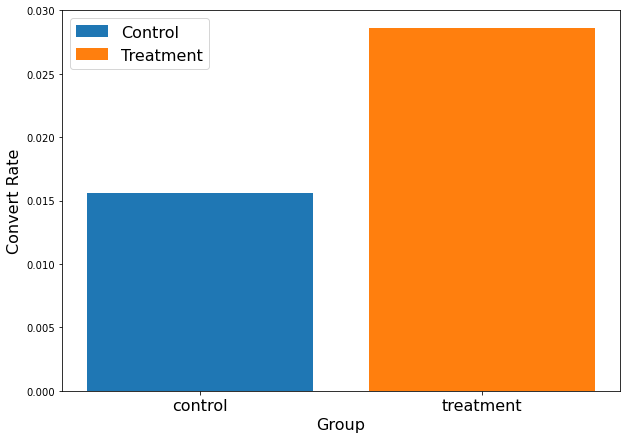

In [24]:
# visualisasi perbandingan convert rate tiap grup
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("control", conv_rate_cont, label="Control")
ax.bar("treatment", conv_rate_treat, label="Treatment")

# Styling plot
ax.set_ylabel("Convert Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

#### Hipotesis Testing
- Kita ingin membuktikan: **convert rate** atau **proporsi** user yang convert **setelah terekspos kampanye iklan terbaru** adalah **lebih besar**  dari **convert rate** atau **proporsi** user yang convert  **dengan kampanye lama yaitu Public Services Announcement (PSA)** 
- Misal,
  - $p_1$ adalah convert rate **treatment** 
  - $p_2$ adalah convert rate **control**
  
- Maka kita bisa mendefinisikan Null hypothesis ($H_0$) dan Alternative hypothesis ($H_1$)

    $$H_0 : p_1 = p_2$$
    $$H_1 : p_1 > p_2$$

- Set siginificance level (alpha) pada level 0.05

#### Menentukan Statistical Test

Pada kasus ini adalah menghitung perbedaan proporsi dari dua grup maka statistik uji yang digunakan adalah **Two proportion z-test**
Langkah yang dilakukan untuk menguji statistik ini adalah sebagai berikut:


In [25]:
# Buat count convert & total observation
count_convert = [n_convert_treat, n_convert_cont]
count_observation = [n_treatment, n_control]

# Buat alternative hipotesis, dalam kasus ini adalah alternative yang lebih besar
alternative_option = "larger"

In [26]:
print(count_convert)
print(count_observation)

[22, 12]
[770, 770]


In [27]:
# Selanjutnya yaitu melakukan pengujian
# import library
from statsmodels.stats.proportion import proportions_ztest

# Panggil fungsi
z_stat, p_value = proportions_ztest(count = count_convert,
                                       nobs = count_observation,
                                       alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 1.7342
P-value : 0.0414


#### Membuat Aturan Keputusan

In [28]:
from scipy import stats

# critical value
alpha= 0.05
z_crit = stats.norm.ppf(1-alpha)

print(f"z critical value : {z_crit:.4f}")

z critical value : 1.6449


In [29]:
#Melakukan pengambilan keputusan dari z-stats dan z-crit
if z_stat > z_crit:
  print("Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan\
  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA")
else:
  print("Menerima H0 : tidak terdapat perbedaan conversion rate antara orang yang terekspose kampanye\
  iklan terbaru dengan orang yang terekspos kampannye PSA")

Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA


In [30]:
# Perbandingan P-Value dengan alpha.
if p_value<0.05:
  print("Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan\
  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA")
else:
  print("Menerima H0 : tidak terdapat perbedaan conversion rate antara orang yang terekspose kampanye\
  iklan terbaru dengan orang yang terekspos kampannye PSA")

Menolak H0 : terdapat perbedaan conversion rate antara orang yang terekspose kampanye iklan  terbaru akan lebih tinggi dengan orang yang terekspos kampannye PSA


#### Visualisai Hasil Keputusan

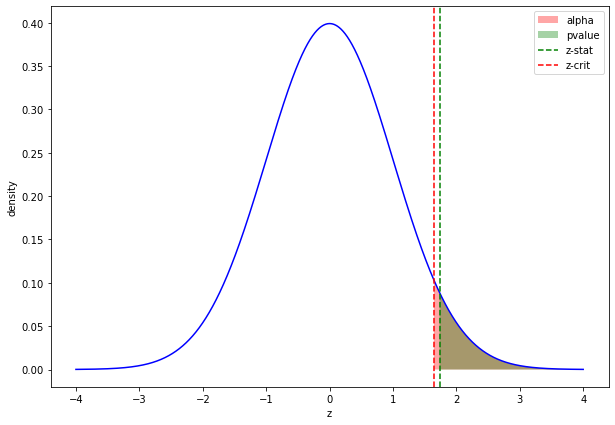

z statistics : 1.7342
z critical : 1.6449


In [31]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution 
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1), 
         color='blue')

# plot alpha region
x_alpha = np.arange(z_crit,4, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat,4, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat, 4), 
            color ="green", 
            linestyle = "--", 
            label ="z-stat")

plt.axvline(z_crit, 
            color ="red", 
            linestyle = "--", 
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.show()

print(f"z statistics : {z_stat:.4f}")
print(f"z critical : {z_crit:.4f}")

#### Menghitung Confidence Interval

In [32]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = n_convert_treat, nobs1 = n_treatment,
                                                 count2 = n_convert_cont, nobs2 = n_control, 
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(-0.0019786518209872796, 0.02876490654499006)


### Part V - Interpretation and Recommendation

#### Interpretasi Kesimpulan

Dengan tingkat keyakinan 95%, terdapat perbedaan yang signifikan bahwa tingkat konversi (convert rate) orang yang tertekspose oleh kampanye iklan baru (treatment) cenderung **lebih tinggi** dibandingkan dibaidngkan dengan orang yang masih terekspose pleh Public Services Announcem,ent (contorl).

Selain itu, hasil confidence interval sebesar 95% bahwa selisih atau difference proporsi orang yang convert (convert rate) pada grup treatment (Ads) dan kontrol (PSA) terletak antara -0.002 dan 0.028 yang artinya bahwa peningkatan convert rate orang yang terekspos kampanye iklan baru (treatment) meningkat bisa manurun mnaksimal 0.002 dan meningkat sampai 0.028. Nilai negatif ini akan menjadi bahasan pada bab rekomendasi.


#### Rekomendasi

Rekomendasi untuk marketplace : berdasarkan hasil statistical test hasilnya adalah **statistically significant**, namun untuk membuat keputusan apakah akan tetap menggunakan iklan terbaru atau tidak, harus dipastikan apakah secara **practically sigificant** seperti biaya untuk produksi, biaya penayangan yang seharusnya dapat tercover oleh kenaikan maksimal sebesar 0.028.

Confidence Interval yang negatif ini desebabkan oleh nilai p-value yang hampir mendekati taraf signifikansi, hal itu dapat disebabkan oleh:
- Ukuran sampel yang digunakan,
- Proporsi sampel yang digunakan (Sample Ratio Missmatch pada dataset)
- Cara pengambilan sampel (randomisasi)

Sampel saat ini yang dibuat adalah sebesar 770 sampel, sementara dataset yang tersedia berkisatr 500rb. Maka perlu dibuat perbnadingan apabila menggunakan sampel kecil hingga seluruh dataset.

**Penggunaan 50 Sampel**

In [33]:
# Ambil 100 sampel
sample_ad_50 = user_ad.sample(n=50, random_state=1)
sample_psa_50 = user_psa.sample(n=50, random_state=1)

# Hitung User Convert
n_convert_cont_50 = (sample_psa_50['converted']).value_counts()[True]
n_convert_treat_50 = (sample_ad_50['converted']).value_counts()[True]

# Hitung total user per grup
n_control_50 = sample_psa_50.shape[0]
n_treatment_50 = sample_ad_50.shape[0]

# Mencari Convert rate Masing-masing grup
conv_rate_cont_50 = n_convert_cont_50/n_control_50
conv_rate_treat_50 = n_convert_treat_50/n_treatment_50

# Buat count convert & total observation
count_convert_50 = [n_convert_treat_50, n_convert_cont_50]
count_observation_50 = [n_treatment_50, n_control_50]

# Buat alternative hipotesis, dalam kasus ini adalah alternative yang lebih besar
alternative_option = "larger"

# Melakukan Pengujian
z_stat, p_value = proportions_ztest(count = count_convert_50,
                                       nobs = count_observation_50,
                                       alternative = alternative_option)


#Menghitung Confidence Interval
confidence_interval_50 = confint_proportions_2indep(count1 = n_convert_treat_50, nobs1 = n_treatment_50,
                                                 count2 = n_convert_cont_50, nobs2 = n_control_50, 
                                                 compare='diff', alpha=0.05)


print(f"Orang yang convert  : {count_convert_50}")
print(f"Observasi           : {count_observation_50}")
print(f"Convert rate (PSA)  : {conv_rate_cont_50:.3f}")
print(f"Convert rate (Ad)   : {conv_rate_treat_50:.3f}")
print(f"Z stats             : {z_stat:.4f}")
print(f"P-value             : {p_value:.4f}")
print(f"Confidence_interval : {confidence_interval_50}")

Orang yang convert  : [4, 1]
Observasi           : [50, 50]
Convert rate (PSA)  : 0.020
Convert rate (Ad)   : 0.080
Z stats             : 1.3765
P-value             : 0.0843
Confidence_interval : (-0.037799313717036265, 0.16962534201371)


**Penggunaan All Sampel**

In [34]:
# Hitung User Convert
n_convert_cont_all = (user_psa['converted']).value_counts()[True]
n_convert_treat_all = (user_ad['converted']).value_counts()[True]

# Hitung total user per grup
n_control_all = user_psa.shape[0]
n_treatment_all = user_ad.shape[0]

# Mencari Convert rate Masing-masing grup
conv_rate_cont_all = n_convert_cont_all/n_control_all
conv_rate_treat_all = n_convert_treat_all/n_treatment_all

# Buat count convert & total observation
count_convert_all = [n_convert_treat_all, n_convert_cont_all]
count_observation_all = [n_treatment_all, n_control_all]

# Buat alternative hipotesis, dalam kasus ini adalah alternative yang lebih besar
alternative_option = "larger"

# Melakukan Pengujian
z_stat, p_value = proportions_ztest(count = count_convert_all,
                                       nobs = count_observation_all,
                                       alternative = alternative_option)


#Menghitung Confidence Interval
confidence_interval_all = confint_proportions_2indep(count1 = n_convert_treat_all, nobs1 = n_treatment_all,
                                                 count2 = n_convert_cont_all, nobs2 = n_control_all, 
                                                 compare='diff', alpha=0.05)


print(f"Orang yang convert  : {count_convert_all}")
print(f"Observasi           : {count_observation_all}")
print(f"Convert rate (PSA)  : {conv_rate_cont_all}")
print(f"Convert rate (Ad)   : {conv_rate_treat_all}")
print(f"Z stats             : {z_stat:.4f}")
print(f"P-value             : {p_value}")
print(f"Confidence_interval : {confidence_interval_all}")

Orang yang convert  : [14423, 420]
Observasi           : [564577, 23524]
Convert rate (PSA)  : 0.01785410644448223
Convert rate (Ad)   : 0.025546559636683747
Z stats             : 7.3701
P-value             : 8.526403580779863e-14
Confidence_interval : (0.005872331745829211, 0.009361237095548102)


**Rangkuman Tabel**

<center>

|Ukuran sampel|PSA convert|PSA Obs|Psa Conv Rate|Ads convert|Ads Obs|Ads Conv Rate|P-value|Confidence Interval|
|:--|:--:|:--:|:--:|:--|:--:|:--:|:--:|:--:|
|50 sampel|1|50|0.02|4|50|0.08|0.0843|(-0.037, 0.169)|
|770 sampel|12|770|0.016|22|770|0.029|0.0414|(-0.001, 0.028)|
|All sampel|420|23.524|0.017|14.423|564.577|0.025|8.52e-14|(0.005, 0.0093)|

</center>

Dari perbandingan tabel perbedaan jumlah sampel dapat terlihat bahwa semakin besar sampel menunjukkan perbedaan convert rate yang hampir sama dan p-value signifikan serta confidence interval positif. Hal yang menjadi perhatian lainnya adalah jumlah sampel atau proporsi antara grup control dan tereatment berbeda jauh. Hal ini akan dibuktikan dengan analisis SRM untuk seluruh dataset.

In [35]:
observed_all = [ n_control_all, n_treatment_all ]
total_show_all = sum(observed_all)
expected_all = [ total_show_all/2, total_show_all/2 ]

#calculate chi-square statistics
from scipy.stats import chisquare
chi_all = chisquare(observed_all, f_exp=expected_all)

# Comparison of chi-square statistics with critical value
# We must calculate the critical first

# critical value is the chi-square value at alpha
alpha = 0.01
df=(2-1)*(2-1)  

import scipy
chi_critical_all = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical_all:.3f}")

#Make decisions from chi-square statistics and critical value
if chi_all[0] > chi_critical_all:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Critical value: 6.635
Reject H0 : SRM may be present.
